In [0]:
import pandas as pd
import numpy as np


In [6]:
from google.colab import files
uploaded = files.upload()

Saving books.csv to books.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['books.csv']))

In [8]:
df2.head()

,bookID,title,authors,rating,pages
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃƒÆ’Ã‚Â©,5,652
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃƒÆ’Ã‚Â©,4,870
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4,352
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃƒÆ’Ã‚Â©,5,435
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃƒÆ’Ã‚Â©,5,2690


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
df2.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
The Iliad                 9
The Brothers Karamazov    9
Anna Karenina             8
'Salem's Lot              8
The Odyssey               8
Name: rating, dtype: int64

In [13]:
df2.groupby('title')['rating'].mean(numeric_only=False).sort_values(ascending=False).head()

title
The Lord of the Rings: The Art of the Fellowship of the Ring                                                                                         5.0
Minor Works: On Colours/On Things Heard/Physiognomics/On Plants/On Marvellous Things Heard/Mechanical Problems/On Indivisible Lines/The...Gorgias    5.0
The Lord of the Rings: The Return of the King - Visual Companion                                                                                     5.0
Interviews with John Kenneth Galbraith (Conversations with Public Intellectuals)                                                                     5.0
The J.R.R. Tolkien Companion and Guide                                                                                                               5.0
Name: rating, dtype: float64

In [14]:
ratings = pd.DataFrame(df2.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
said the shotgun to the head.,4.0
$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,3.0
'Salem's Lot,4.0
1 000 Places to See Before You Die,4.0
10 lb Penalty,4.0


In [15]:
ratings['num of ratings'] = pd.DataFrame(df2.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
said the shotgun to the head.,4.0,1
$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,3.0,1
'Salem's Lot,4.0,8
1 000 Places to See Before You Die,4.0,1
10 lb Penalty,4.0,1


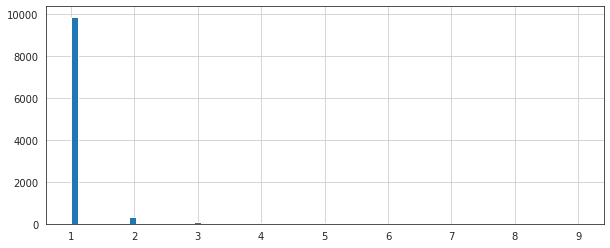

In [16]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

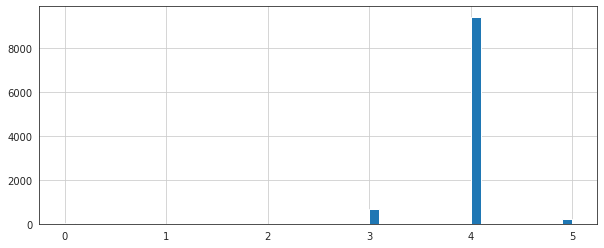

In [17]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=50)

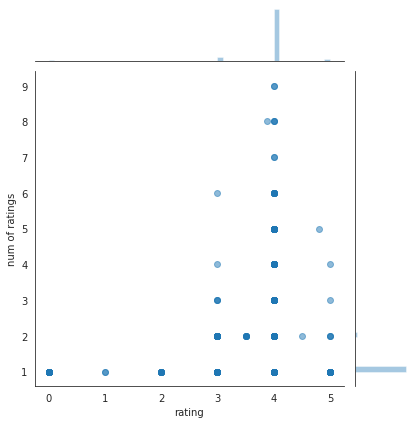

In [18]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [54]:
bookmat = df2.pivot_table(index='bookID',columns='title',values='rating')
bookmat.head()

title,said the shotgun to the head.,$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,'Salem's Lot,1 000 Places to See Before You Die,10 lb Penalty,100 Great Fantasy Short Short Stories,100 Love Sonnets,100 Years of Lynchings,1000 Record Covers,1000 Rings: Inspiring Adornments for the Hand,1001 Illuminated Initial Letters: 27 Full-Color Plates,101 Stories of the Great Ballets: The Scene-by-Scene Stories of the Most Popular Ballets Old and New,11 de Septiembre,13 Little Blue Envelopes (Little Blue Envelope #1),13th Directorate,1421: The Year China Discovered America,1491: New Revelations of the Americas Before Columbus,1599: A Year in the Life of William Shakespeare,1632,1635: The Cannon Law (Assiti Shards #8),1776,18 Best Stories by Edgar Allan Poe,1848: The Revolution of the Intellectuals,1912 Manuscript on the Special Theory of Relativity,1919 (U.S.A. #2),1968: The Year That Rocked the World,1968: War and Democracy,1984,1st To Die (The Women's Murder Club #1),1st to Die (Women's Murder Club #1),20 000 Leagues Under The Sea,20 000 Leagues Under the Sea,200 Quilt Blocks: To Mix and Match,2006 International Building Code,2012: The Return of Quetzalcoatl,22 Indigo Place,23 Days in July: Inside the Tour de France and Lance Armstrong's Record-Breaking Victory,25 Ways to Win with People: How to Make Others Feel Like a Million Bucks,2nd Chance (Women's Murder Club #2),2nd Chance (Women's Murder Club #2),...,ÃƒÂ¥Ã‚ÂÃ‚Â«ÃƒÂ£Ã¢â‚¬Å¡Ã¢â‚¬Å“ÃƒÂ£Ã‚ÂÃ‚Â§ÃƒÂ£Ã¢â‚¬Å¡Ã¢â‚¬Å¾ÃƒÂ£Ã¢â‚¬Å¡Ã¢â‚¬Â¹ÃƒÂ£Ã‚ÂÃ…â€œ! (2) (ASUKA COMICS CL-DX),ÃƒÂ¥Ã‚Â½Ã‚Â¼ÃƒÂ¦Ã¢â‚¬â€œÃ‚Â¹ÃƒÂ£Ã‚ÂÃ¢â‚¬Â¹ÃƒÂ£Ã¢â‚¬Å¡Ã¢â‚¬Â° 13,ÃƒÂ¦Ã‚Â·Ã‚Â·ÃƒÂ¨Ã‚Â¡Ã¢â€šÂ¬ÃƒÂ§Ã…Â½Ã¢â‚¬Â¹ÃƒÂ¥Ã‚Â­Ã‚ÂÃƒÂ§Ã…Â¡Ã¢â‚¬Å¾ÃƒÂ¨Ã†â€™Ã…â€™ÃƒÂ¥Ã‚ÂÃ¢â‚¬Âº (ÃƒÂ¥Ã¢â‚¬Å“Ã‹â€ ÃƒÂ¥Ã‹â€ Ã‚Â©ÃƒÂ¦Ã‚Â³Ã‚Â¢ÃƒÂ§Ã¢â‚¬Â°Ã‚Â¹ #6),ÃƒÂ¦Ã‹â€ Ã‚Â°ÃƒÂ¥Ã‚Â»Ã‚Â¢ÃƒÂ¥Ã¢â‚¬Å“Ã‚Â,ÃƒÂ§Ã¢â‚¬Å¾Ã‚Â¼ÃƒÂ£Ã‚ÂÃ‚ÂÃƒÂ£Ã‚ÂÃ…Â¸ÃƒÂ£Ã‚ÂÃ‚Â¦!!ÃƒÂ£Ã¢â‚¬Å¡Ã‚Â¸ÃƒÂ£Ã†â€™Ã‚Â£ÃƒÂ£Ã‚ÂÃ‚Â±ÃƒÂ£Ã¢â‚¬Å¡Ã¢â‚¬Å“ 1,ÃƒÂ§Ã¢â‚¬Å¾Ã‚Â¼ÃƒÂ£Ã‚ÂÃ‚ÂÃƒÂ£Ã‚ÂÃ…Â¸ÃƒÂ£Ã‚ÂÃ‚Â¦!!ÃƒÂ£Ã¢â‚¬Å¡Ã‚Â¸ÃƒÂ£Ã†â€™Ã‚Â£ÃƒÂ£Ã‚ÂÃ‚Â±ÃƒÂ£Ã¢â‚¬Å¡Ã¢â‚¬Å“ 9 [Yakitate!! Japan 9],ÃƒÂ§Ã‚ÂÃ‚Â«ÃƒÂ§Ã¢â‚¬ÂºÃ†â€™ÃƒÂ§Ã…Â¡Ã¢â‚¬Å¾ÃƒÂ¨Ã¢â€šÂ¬Ã†â€™ÃƒÂ©Ã‚Â©Ã¢â‚¬â€ (ÃƒÂ¥Ã¢â‚¬Å“Ã‹â€ ÃƒÂ¥Ã‹â€ Ã‚Â©ÃƒÂ¦Ã‚Â³Ã‚Â¢ÃƒÂ§Ã¢â‚¬Â°Ã‚Â¹ #4),ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 27,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 1,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 10,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 12,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 14,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 17,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 22,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 24,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 26,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 28,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 4,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 7,ÃƒÂ§Ã…Â Ã‚Â¬ÃƒÂ¥Ã‚Â¤Ã…â€œÃƒÂ¥Ã‚ÂÃ¢â‚¬Â° 8,ÃƒÂ©Ã¢â‚¬Â¡Ã…Â½ÃƒÂ§Ã‚ÂÃ‚Â¸ÃƒÂ¥Ã…â€œÃ¢â‚¬Â¹ (ÃƒÂ¦Ã‚Â¼Ã‚Â¢ÃƒÂ¨Ã‚ÂÃ‚Â²ÃƒÂ§Ã‚Â²Ã‚Â¾ÃƒÂ©Ã‚ÂÃ‚Â¸ÃƒÂ¤Ã‚Â¸Ã¢â‚¬â€œÃƒÂ§Ã¢â‚¬Â¢Ã…â€™ÃƒÂ¦Ã…â€œÃ¢â€šÂ¬ÃƒÂ¤Ã‚Â½Ã‚Â³ÃƒÂ¥Ã¢â‚¬Â¦Ã¢â‚¬â„¢ÃƒÂ§Ã‚Â«Ã‚Â¥ÃƒÂ¥Ã…â€œÃ¢â‚¬â€œÃƒÂ§Ã¢â‚¬Â¢Ã‚Â«ÃƒÂ¦Ã¢â‚¬ÂºÃ‚Â¸ÃƒÂ¯Ã‚Â¼Ã…Â½ÃƒÂ¥Ã‚Â¿Ã†â€™ÃƒÂ§Ã‚ÂÃ¢â‚¬Â ÃƒÂ¦Ã‹â€ Ã‚ÂÃƒÂ©Ã¢â‚¬Â¢Ã‚Â·ÃƒÂ©Ã‚Â¡Ã…Â¾ #36),ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ£Ã‚ÂÃ‚Â®ÃƒÂ©Ã…â€™Ã‚Â¬ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“ÃƒÂ¥Ã‚Â¸Ã‚Â« 1 [Hagane no Renkinjutsushi 1] (Fullmetal Alchemist #1),ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ£Ã‚ÂÃ‚Â®ÃƒÂ©Ã…â€™Ã‚Â¬ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“ÃƒÂ¥Ã‚Â¸Ã‚Â« 3 (Fullmetal Alchemist #3),ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ£Ã‚ÂÃ‚Â®ÃƒÂ©Ã…â€™Ã‚Â¬ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“ÃƒÂ¥Ã‚Â¸Ã‚Â« 4 (Fullmetal Alchemist #4),ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ£Ã‚ÂÃ‚Â®ÃƒÂ©Ã…â€™Ã‚Â¬ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“ÃƒÂ¥Ã‚Â¸Ã‚Â« 5 (Fullmetal Alchemist #5),ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ£Ã‚ÂÃ‚Â®ÃƒÂ©Ã…â€™Ã‚Â¬ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“ÃƒÂ¥Ã‚Â¸Ã‚Â« 8 (Fullmetal Alchemist 8),ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ¤Ã‚Â¹Ã¢â‚¬Â¹ÃƒÂ©Ã‚ÂÃ…Â ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“ÃƒÂ¥Ã‚Â¸Ã‚Â« 1,ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ¤Ã‚Â¹Ã¢â‚¬Â¹ÃƒÂ©Ã‚ÂÃ…Â ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“ÃƒÂ¥Ã‚Â¸Ã‚Â« 10,ÃƒÂ©Ã¢â‚¬Â¹Ã‚Â¼ÃƒÂ¤Ã‚Â¹Ã¢â‚¬Â¹ÃƒÂ©Ã‚ÂÃ…Â ÃƒÂ©Ã¢â‚¬Â¡Ã¢â‚¬ËœÃƒÂ¨Ã‚Â¡Ã¢â‚¬Å“

In [55]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
The Brothers Karamazov,4.000,9
The Iliad,4.000,9
Anna Karenina,4.000,8
'Salem's Lot,4.000,8
Gulliver's Travels,3.875,8
The Odyssey,4.000,8
The Picture of Dorian Gray,4.000,7
A Midsummer Night's Dream,4.000,7
The Scarlet Letter,3.000,6


In [56]:
ratings.head()

,rating,num of ratings
title,,
said the shotgun to the head.,4.0,1
$30 Film School: How to Write Direct Produce Shoot Edit Distribute Tour With and Sell Your Own No-Budget Digital Movie,3.0,1
'Salem's Lot,4.0,8
1 000 Places to See Before You Die,4.0,1
10 lb Penalty,4.0,1


In [85]:
theiliad_user_ratings = bookmat['The Scarlet Letter']
travels_user_ratings = bookmat["Gulliver's Travels"]
travels_user_ratings.head()

bookID
1   NaN
2   NaN
4   NaN
5   NaN
8   NaN
Name: Gulliver's Travels, dtype: float64

In [0]:
similar_to_theiliad = bookmat.corrwith(theiliad_user_ratings)
similar_to_travels = bookmat.corrwith(travels_user_ratings)

In [87]:
corr_theiliad = pd.DataFrame(similar_to_theiliad,columns=['Correlation'])
corr_theiliad.dropna(inplace=True)
corr_theiliad.head()


,Correlation
title,


In [88]:
corr_travels = pd.DataFrame(similar_to_travels,columns=['Correlation'])
corr_travels.dropna(inplace=True)
corr_travels.head()


,Correlation
title,
Gulliver's Travels,1.0


In [89]:
corr_travels = corr_travels.join(ratings['num of ratings'])
corr_travels.head()

,Correlation,num of ratings
title,,
Gulliver's Travels,1.0,8
